In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
job_df = pd.read_csv('/content/drive/MyDrive/KDT 시즌2/8. 머신러닝과 딥러닝/data/jobs_in_data.csv')
job_df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [ ]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [ ]:
job_df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

1. work_year: 근무 연차
2. job_title: 직책 또는 직무 제목
3. job_category: 직무 카테고리
4. salary_currency: 급여 통화
5. salary: 급여
6. salary_in_usd: 미국 달러로 표시된 급여
7. employee_residence: 근로자 거주지
8. experience_level: 경험 수준
9. employment_type: 고용 형태
10. work_setting: 근무 환경 또는 조건
11. company_location: 회사 위치
12. company_size: 회사 규모

In [ ]:
ㄴ# NaN값 확인
job_df.isna().mean()

work_year             0.0
job_title             0.0
job_category          0.0
salary_currency       0.0
salary                0.0
salary_in_usd         0.0
employee_residence    0.0
experience_level      0.0
employment_type       0.0
work_setting          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [ ]:
# 확인
job_df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [ ]:
# 월급 기준
# salary_in_usd: 달러 환산한 월급
# salary_currency, salary
job_df.drop(['salary_currency', 'salary'], axis =1, inplace = True)

In [ ]:
# work_year -> 연차
job_df['work_year'].value_counts()

2023    7453
2022    1634
2021     197
2020      71
Name: work_year, dtype: int64

In [ ]:
job_df['work_year'] = job_df['work_year'].apply(lambda x: 2024 - x)
job_df['work_year'].value_counts()

1    7453
2    1634
3     197
4      71
Name: work_year, dtype: int64

In [ ]:
job_df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,1,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,1,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,1,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,1,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,1,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


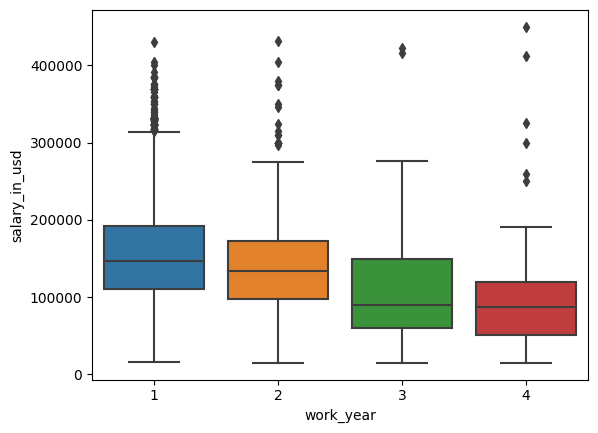

In [ ]:
# 연찬 - 월급
sns.boxplot(x='work_year', y ='salary_in_usd', data = job_df)
plt.show()

In [ ]:
# 확인
job_df.nunique()

work_year                4
job_title              125
job_category            10
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [ ]:
# job_titile -> 125
# job_category -> 10
# job_catrgory 선택, job_title 제거
job_df.drop('job_title', axis =1, inplace = True)

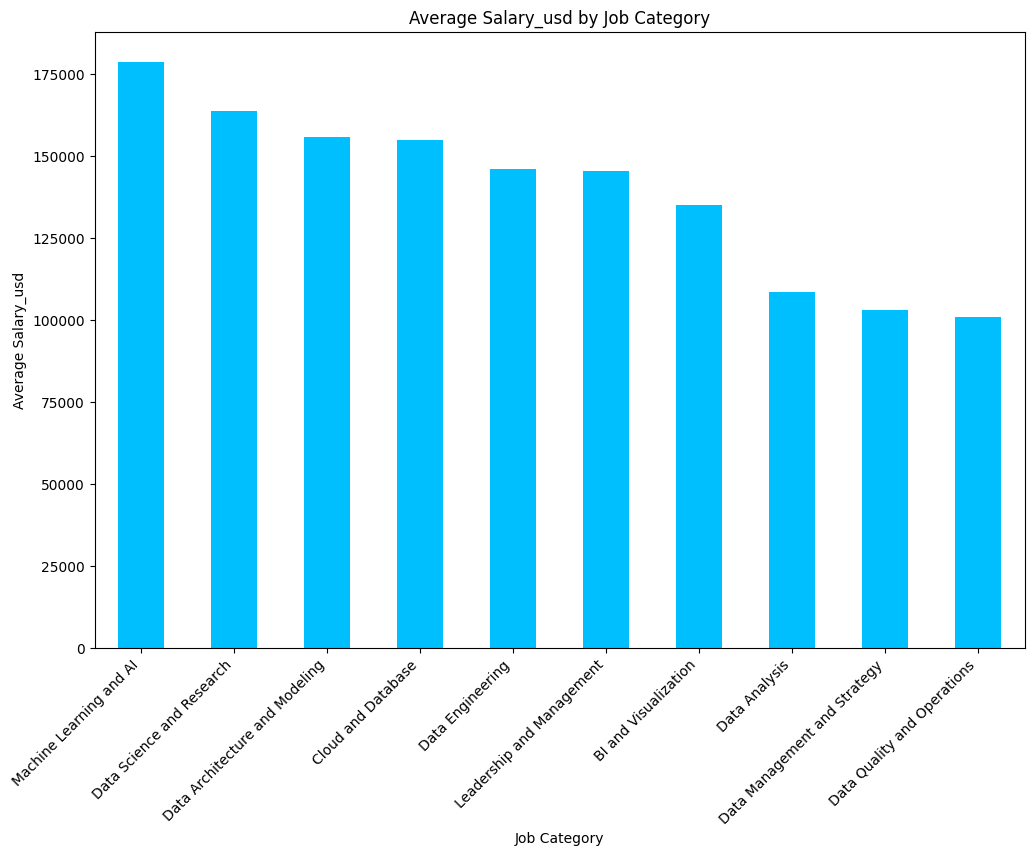

In [ ]:
# 한 카테고리의 평균 월급 -> 카테고리
average_salary_by_category = job_df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
average_salary_by_category.plot(kind='bar', color='deepskyblue')
plt.title('Average Salary_usd by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary_usd')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 카테고리별 원 핫 인코딩
job_df = pd.get_dummies(job_df, columns=['job_category'])
job_df.head()

,work_year,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI
0,1,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,0,0,0,0,1,0,0,0,0,0
1,1,186000,United States,Senior,Full-time,In-person,United States,M,0,0,0,1,0,0,0,0,0,0
2,1,81800,United States,Senior,Full-time,In-person,United States,M,0,0,0,1,0,0,0,0,0,0
3,1,212000,United States,Senior,Full-time,In-person,United States,M,0,0,0,0,0,0,0,1,0,0
4,1,93300,United States,Senior,Full-time,In-person,United States,M,0,0,0,0,0,0,0,1,0,0


In [ ]:
# employee_residence: 체용자 거주지
job_df['employee_residence'].value_counts()

United States     8086
United Kingdom     442
Canada             224
Spain              117
Germany             66
                  ... 
Andorra              1
Qatar                1
Mauritius            1
Uganda               1
Malta                1
Name: employee_residence, Length: 83, dtype: int64

In [ ]:
# company_location: 회사 위치(국가)
job_df['company_location'].value_counts()

United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: company_location, Length: 70, dtype: int64

In [ ]:
# 둘다 월급랑 연과성을 찾지는 못했다
# 그래서 또 제거
job_df.drop(['employee_residence', 'company_location'], axis =1, inplace = True)

In [ ]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   work_year                                    9355 non-null   int64 
 1   salary_in_usd                                9355 non-null   int64 
 2   experience_level                             9355 non-null   object
 3   employment_type                              9355 non-null   object
 4   work_setting                                 9355 non-null   object
 5   company_size                                 9355 non-null   object
 6   job_category_BI and Visualization            9355 non-null   uint8 
 7   job_category_Cloud and Database              9355 non-null   uint8 
 8   job_category_Data Analysis                   9355 non-null   uint8 
 9   job_category_Data Architecture and Modeling  9355 non-null   uint8 
 10  job_category

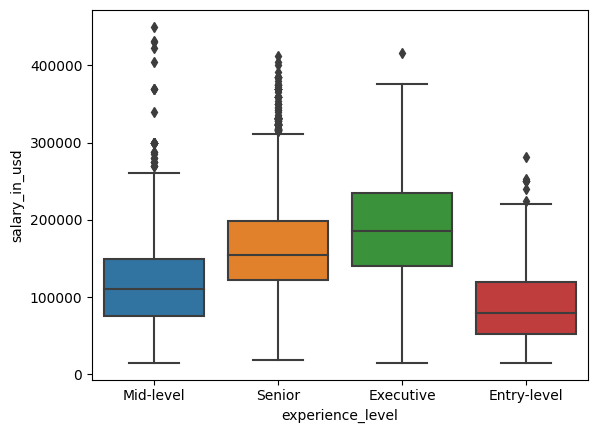

In [ ]:
# experience_level: 경력 레벨
sns.boxplot(x='experience_level', y ='salary_in_usd', data = job_df)
plt.show()

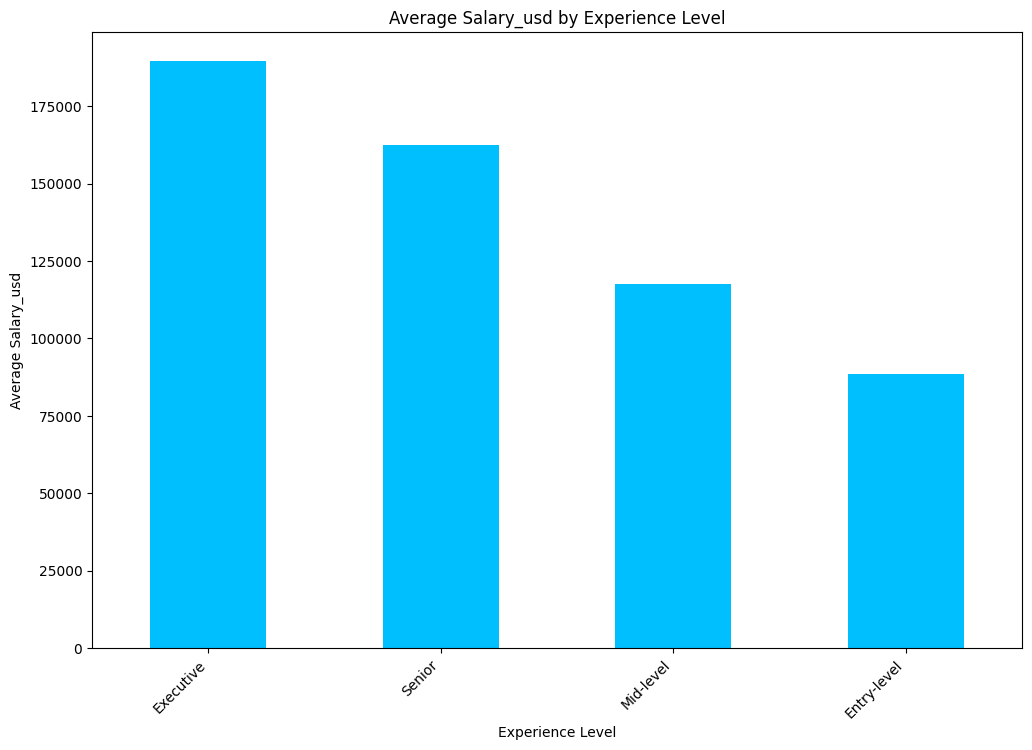

In [ ]:
# 경력 레벨 별 평균 월급 -> 경력 레벨
average_salary_by_category = job_df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
average_salary_by_category.plot(kind='bar', color='deepskyblue')
plt.title('Average Salary_usd by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary_usd')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 경험 레벨 원핫 인코딩
job_df = pd.get_dummies(job_df, columns=['experience_level'])
job_df.head()

,work_year,salary_in_usd,employment_type,work_setting,company_size,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI,experience_level_Entry-level,experience_level_Executive,experience_level_Mid-level,experience_level_Senior
0,1,95012,Full-time,Hybrid,L,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,186000,Full-time,In-person,M,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,81800,Full-time,In-person,M,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,212000,Full-time,In-person,M,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,93300,Full-time,In-person,M,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   work_year                                    9355 non-null   int64 
 1   salary_in_usd                                9355 non-null   int64 
 2   employment_type                              9355 non-null   object
 3   work_setting                                 9355 non-null   object
 4   company_size                                 9355 non-null   object
 5   job_category_BI and Visualization            9355 non-null   uint8 
 6   job_category_Cloud and Database              9355 non-null   uint8 
 7   job_category_Data Analysis                   9355 non-null   uint8 
 8   job_category_Data Architecture and Modeling  9355 non-null   uint8 
 9   job_category_Data Engineering                9355 non-null   uint8 
 10  job_category

In [ ]:
# employment_type: 고용 방식
job_df['employment_type'].value_counts()

Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: employment_type, dtype: int64

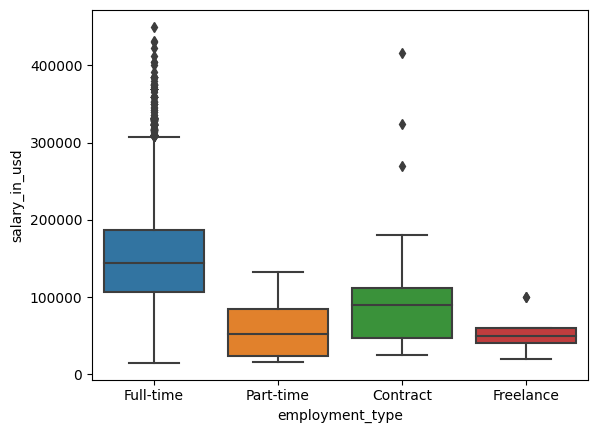

In [ ]:
sns.boxplot(x='employment_type', y ='salary_in_usd', data = job_df)
plt.show()

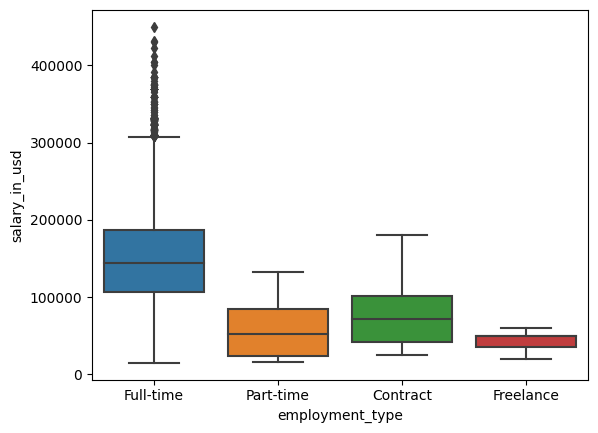

In [ ]:
# Contract의 3개 이상치, Freelance의 1개 이상치 제거
job_df = job_df[~((job_df['employment_type'] == 'Contract') & (job_df['salary_in_usd'] > 250000))]
job_df = job_df[~((job_df['employment_type'] == 'Freelance') & (job_df['salary_in_usd'] > 90000))]

sns.boxplot(x='employment_type', y ='salary_in_usd', data = job_df)
plt.show()

In [ ]:
# 고용 방식 원 핫 인코딩
job_df = pd.get_dummies(job_df, columns=['employment_type'])
job_df.head()

,work_year,salary_in_usd,work_setting,company_size,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,...,job_category_Leadership and Management,job_category_Machine Learning and AI,experience_level_Entry-level,experience_level_Executive,experience_level_Mid-level,experience_level_Senior,employment_type_Contract,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time
0,1,95012,Hybrid,L,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,186000,In-person,M,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,81800,In-person,M,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,212000,In-person,M,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,93300,In-person,M,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
# work_setting: 근무 형식
# In-person:
# Remote: 재택 근무
# Hybrid: 둘다
job_df['work_setting'].value_counts()

In-person    5730
Remote       3429
Hybrid        191
Name: work_setting, dtype: int64

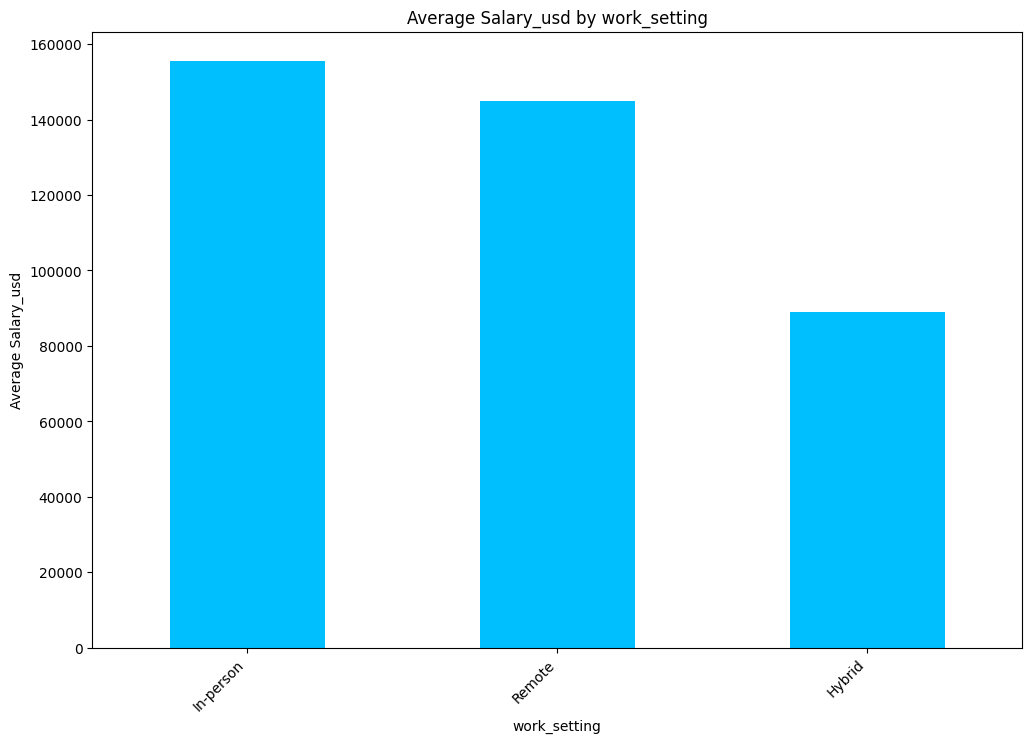

In [ ]:
# 근무 형식 별 평균 월급 -> 근무 형식
average_salary_by_work_setting = job_df.groupby('work_setting')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
average_salary_by_work_setting.plot(kind='bar', color='deepskyblue')
plt.title('Average Salary_usd by work_setting')
plt.xlabel('work_setting')
plt.ylabel('Average Salary_usd')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9350 entries, 0 to 9354
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   work_year                                    9350 non-null   int64 
 1   salary_in_usd                                9350 non-null   int64 
 2   work_setting                                 9350 non-null   object
 3   company_size                                 9350 non-null   object
 4   job_category_BI and Visualization            9350 non-null   uint8 
 5   job_category_Cloud and Database              9350 non-null   uint8 
 6   job_category_Data Analysis                   9350 non-null   uint8 
 7   job_category_Data Architecture and Modeling  9350 non-null   uint8 
 8   job_category_Data Engineering                9350 non-null   uint8 
 9   job_category_Data Management and Strategy    9350 non-null   uint8 
 10  job_category

In [ ]:
# work_setting 원 핫 인코딩
job_df = pd.get_dummies(job_df, columns=['work_setting'])
job_df.head()

,work_year,salary_in_usd,company_size,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,...,experience_level_Executive,experience_level_Mid-level,experience_level_Senior,employment_type_Contract,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,work_setting_Hybrid,work_setting_In-person,work_setting_Remote
0,1,95012,L,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,1,186000,M,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,81800,M,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,1,212000,M,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,1,93300,M,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
# company_size: 회사 규모
# M: 중견 기업
# L: 대기업
# S: 중소기
job_df['company_size'].value_counts()

M    8445
L     747
S     158
Name: company_size, dtype: int64

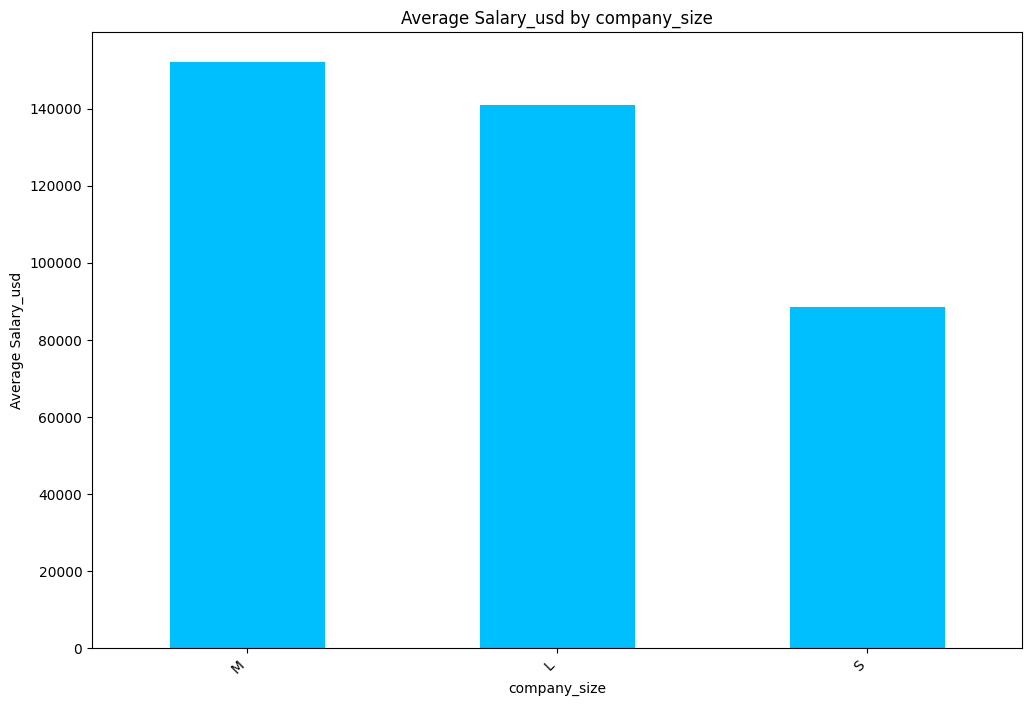

In [ ]:
# 회사 규모 별 평균 월급 -> 회사 규모
average_salary_by_company_size = job_df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
average_salary_by_company_size.plot(kind='bar', color='deepskyblue')
plt.title('Average Salary_usd by company_size')
plt.xlabel('company_size')
plt.ylabel('Average Salary_usd')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# company_size 원 핫 인코딩
job_df = pd.get_dummies(job_df, columns=['company_size'])
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9350 entries, 0 to 9354
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   work_year                                    9350 non-null   int64
 1   salary_in_usd                                9350 non-null   int64
 2   job_category_BI and Visualization            9350 non-null   uint8
 3   job_category_Cloud and Database              9350 non-null   uint8
 4   job_category_Data Analysis                   9350 non-null   uint8
 5   job_category_Data Architecture and Modeling  9350 non-null   uint8
 6   job_category_Data Engineering                9350 non-null   uint8
 7   job_category_Data Management and Strategy    9350 non-null   uint8
 8   job_category_Data Quality and Operations     9350 non-null   uint8
 9   job_category_Data Science and Research       9350 non-null   uint8
 10  job_category_Leadership 

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(job_df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

<Axes: >

In [ ]:
job_df.info()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(job_df.drop('salary_in_usd', axis = 1), job_df['salary_in_usd'], test_size = 0.2, random_state = 2023)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

# Decision Tree Regression
dtr = DecisionTreeRegressor(random_state = 2023)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# lightGBM
base_model = LGBMRegressor(random_state = 2023)
base_model.fit(X_train, y_train)
base_model_pred = base_model.predict(X_test)

# Suppert Bector Machine
model1 = SVR()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
# lr - RMSE
print(mean_squared_error(lr_pred, y_test , squared=False))

# dtr - RMSE
print(mean_squared_error(dtr_pred, y_test , squared=False))

# rf - RMSE
print(mean_squared_error(rf_pred, y_test , squared=False))

# base_model - RMSE
print(mean_squared_error(base_model_pred, y_test , squared=False))

# y - RMSE
print(mean_squared_error(y_pred1, y_test , squared=False))

In [ ]:
# Random Forest Regression
# lightGBM
# 최적 하이퍼파라비터 찾기
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Random Forest Regression model
rf_Regression = RandomForestRegressor()

# Hyperparameter ranges
param_dist = {
    'n_estimators': list(range(10, 101, 10)),
    'max_depth': list(range(1, 21, 1)),
    'min_samples_split': list(range(1, 21, 1)),
    'min_samples_leaf': list(range(10, 21, 1)),
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV for finding the best hyperparameters
random_search = RandomizedSearchCV(rf_Regression, param_distributions=param_dist, n_iter=10, cv=5, random_state=2023)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

In [ ]:
best_params = random_search.best_params_

rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features']
)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

In [ ]:
# rf - RMSE
print(mean_squared_error(rf_pred, y_test , squared=False))

In [ ]:
lgbm_Regression = LGBMRegressor()

params = {
    'n_estimators': [50, 100, 200, 300, 500],  # 트리의 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # 학습률
    'max_depth': [3, 5, 7, 9, -1],  # 최대 깊이
    'num_leaves': [15, 31, 63, 127],  # 최대 리프 노드 수
    'min_child_samples': [10, 20, 30, 50],  # 리프 노드가 가져야 하는 최소 샘플 수
    'subsample': [0.7, 0.8, 0.9, 1.0],  # 샘플의 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # 특성의 비율
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],  # L1 정규화
    'reg_lambda': [0.0, 0.1, 0.5, 1.0]  # L2 정규화
}

lgbm_random_search = RandomizedSearchCV(lgbm_Regression, param_distributions=params, n_iter=10, cv=5, random_state=2023)
lgbm_random_search.fit(X_train, y_train)
print("Best LightGBM Hyperparameters:", lgbm_random_search.best_params_)


In [ ]:
lgbm = LGBMRegressor(subsample=0.9,reg_lambda=0.1,reg_alpha=0.0, num_leaves=127,n_estimators=200, min_child_samples=50, max_depth=-1,learning_rate=0.05, colsample_bytree=0.8, random_state=2023)

lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

print(mean_squared_error(base_model_pred, y_test , squared=False))


In [ ]:
# 적용전
# random forest
54588.76834231058

# LightGBM
54148.1970891987

# 적용후
# random forest
54196.776264008695

# LightGBM
54148.1970891987